### 1. 데이터 로드 및 전처리

In [1]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('./data/oes_sample_data.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,24.27,29.14,26.06,24.60,23.08,20.36,20.26,20.58,20.45,20.16,...,94.26,75.33,52.11,30.66,17.53,14.22,13.69,14.54,16.91,20.77
1,27.89,33.18,29.90,27.55,25.30,24.68,23.35,23.25,22.99,23.55,...,115.09,92.55,63.91,38.07,21.46,17.80,16.70,17.40,21.22,25.20
2,27.67,32.44,30.76,28.32,25.64,23.71,23.13,23.22,22.80,23.26,...,114.18,90.71,63.31,37.48,21.25,16.89,16.09,17.37,20.21,25.49
3,27.39,32.67,29.36,27.63,25.37,23.90,23.42,22.57,23.34,23.52,...,111.01,89.17,61.64,36.64,20.71,16.64,15.92,17.24,19.77,24.30
4,27.18,32.80,29.92,27.29,25.45,23.58,22.65,22.63,23.56,23.11,...,108.76,87.26,61.30,35.51,20.69,16.73,15.88,16.84,19.91,23.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.73,55.83,124.53,238.41,291.94,234.17,140.22,66.86,40.85,65.25,...,10.31,10.45,10.68,11.33,12.18,11.82,12.98,12.81,12.91,13.01
246,42.81,56.84,125.32,239.68,292.03,235.06,139.29,67.77,41.70,65.38,...,10.31,10.31,10.83,11.27,12.01,12.34,13.05,12.71,13.58,13.23
247,43.79,56.85,126.46,239.21,295.14,234.10,139.30,66.51,41.09,65.32,...,10.24,10.34,10.68,11.35,11.59,12.52,12.63,13.06,13.06,13.23
248,43.46,55.90,125.64,239.25,296.02,235.10,138.75,66.68,40.66,65.86,...,10.18,10.58,10.60,11.36,11.98,12.56,12.89,13.28,13.70,13.17


### 2. K-means 클러스터링 적용 및 t-sne 시각화
- t-sne 알고리즘 특성상 perplexity에 따라 시각화 결과가 달라짐

In [3]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3, perplexity=10).fit_transform(data.T)
X_embedded.shape

plot_df = pd.DataFrame(X_embedded)

C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jkchoi\miniconda3\envs\ADD\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [4]:
plot_df

,0,1,2
0,0.626238,-7.912276,-6.901997
1,6.336457,-13.179691,-3.117473
2,1.037345,13.011866,12.705280
3,-9.468966,11.288680,-8.566234
4,-14.602141,-0.228284,-12.208862
...,...,...,...
1019,-9.004683,3.812455,2.289742
1020,-8.903352,3.475880,1.769477
1021,-8.579882,3.414422,1.500220
1022,-7.310870,3.860280,1.288051


In [5]:
# k-means clustering 실행
k_list = [3, 5, 7]
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.T)
    plot_df["cluster" + str(k)] = kmeans.labels_

plot_df

,0,1,2,cluster3,cluster5,cluster7
0,0.626238,-7.912276,-6.901997,0,2,3
1,6.336457,-13.179691,-3.117473,0,2,3
2,1.037345,13.011866,12.705280,2,0,6
3,-9.468966,11.288680,-8.566234,2,3,2
4,-14.602141,-0.228284,-12.208862,2,3,5
...,...,...,...,...,...,...
1019,-9.004683,3.812455,2.289742,0,2,0
1020,-8.903352,3.475880,1.769477,0,2,0
1021,-8.579882,3.414422,1.500220,0,2,0
1022,-7.310870,3.860280,1.288051,0,2,0


In [6]:
%matplotlib notebook

In [7]:
plot_df.columns

Index([0, 1, 2, 'cluster3', 'cluster5', 'cluster7'], dtype='object')

<IPython.core.display.Javascript object>


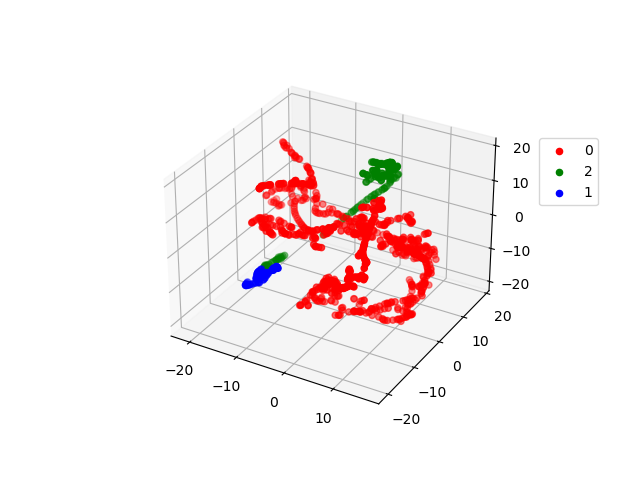

In [8]:
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib import pyplot as plt

cmap = ListedColormap(sns.color_palette('husl',256).as_hex())
cmap = ['red','green','blue','yellow','purple','black','gray']
fig = plt.figure()
ax = plt.axes(projection ='3d')

X = plot_df[0]
Y = plot_df[1]
Z = plot_df[2]

cols = list(plot_df["cluster3"].unique())
for i in range(len(cols)):
    col_index = plot_df[plot_df["cluster3"] == cols[i]].index
    ax.scatter(X[col_index],Y[col_index],Z[col_index],c=cmap[i],label= cols[i])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.8))
plt.show()

<IPython.core.display.Javascript object>


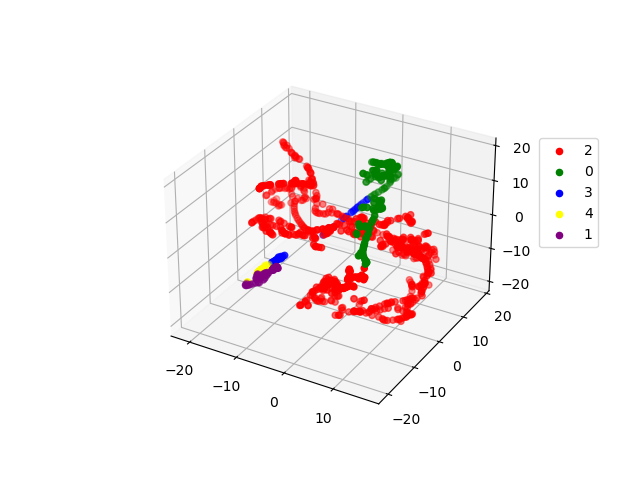

In [9]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

X = plot_df[0]
Y = plot_df[1]
Z = plot_df[2]

cols = list(plot_df["cluster5"].unique())
for i in range(len(cols)):
    col_index = plot_df[plot_df["cluster5"] == cols[i]].index
    ax.scatter(X[col_index],Y[col_index],Z[col_index],c=cmap[i],label= cols[i])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.8))
plt.show()

<IPython.core.display.Javascript object>


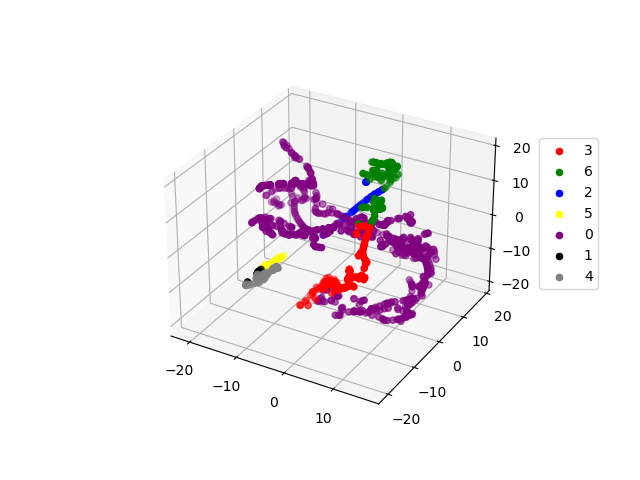

In [10]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

X = plot_df[0]
Y = plot_df[1]
Z = plot_df[2]

cols = list(plot_df["cluster7"].unique())
for i in range(len(cols)):
    col_index = plot_df[plot_df["cluster7"] == cols[i]].index
    ax.scatter(X[col_index],Y[col_index],Z[col_index],c=cmap[i],label= cols[i])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 0.8))
plt.show()

### 3. DBSCAN 클러스터링 적용 및 t-sne 시각화

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan = DBSCAN(eps=10, min_samples=3).fit(data.T)
plot_df["DBSCAN"] = dbscan.labels_
plot_df["DBSCAN"].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 25, 23, 24, 26, 27, 28, 29],
      dtype=int64)

In [13]:
cmap = plt.cm.get_cmap('jet', plot_df["DBSCAN"].nunique())

<IPython.core.display.Javascript object>


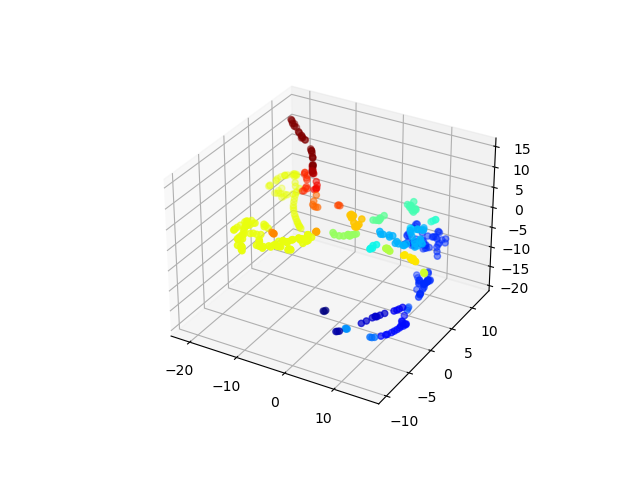

In [14]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

sc = ax.scatter(
    plot_df[plot_df["DBSCAN"] != -1][0], 
    plot_df[plot_df["DBSCAN"] != -1][1], 
    plot_df[plot_df["DBSCAN"] != -1][2], c=plot_df[plot_df["DBSCAN"] != -1]["DBSCAN"], cmap=cmap)
plt.show()

In [15]:
plot_df["DBSCAN"].nunique()

31